In [1]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['KERAS_BACKEND'] = 'tensorflow'

import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
file = np.load('../../Assets/mnist.npz')
(x_train, y_train), (x_test, y_test) = (file['x_train'],file['y_train']),(file['x_test'],file['y_test'])
file.close()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
num_classes = 10

#reshape data
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

# make float32 and normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('%d train samples, %d test samples'%(x_train.shape[0], x_test.shape[0]))
print('training data shape: ', x_train.shape, y_train.shape)
print('test data shape: ', x_test.shape, y_test.shape)

60000 train samples, 10000 test samples
training data shape:  (60000, 28, 28, 1) (60000, 10)
test data shape:  (10000, 28, 28, 1) (10000, 10)


In [5]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

In [6]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

In [7]:
model2.fit(x_train, y_train,
         batch_size=128,
         epochs=10,
         validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.8113 - acc: 0.7453 - val_loss: 0.2544 - val_acc: 0.9218
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1832 - acc: 0.9444 - val_loss: 0.1280 - val_acc: 0.9593
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1200 - acc: 0.9635 - val_loss: 0.0968 - val_acc: 0.9667
Epoch 4/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0917 - acc: 0.9721 - val_loss: 0.0740 - val_acc: 0.9754
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0774 - acc: 0.9764 - val_loss: 0.0651 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0671 - acc: 0.9790 - val_loss: 0.0716 - val_acc: 0.9771
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0589 - acc: 0.9817 - val_loss: 0.0510 -

### Accuracy 0.9881

In [11]:
y_pred = model2.predict(x_test)
y_pred.shape

(10000, 10)

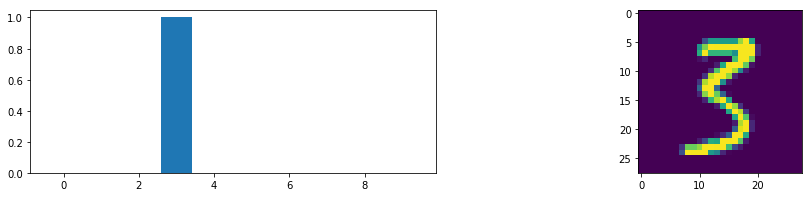

In [54]:
test_seed = int(random.random() *10000)

plt.figure(figsize=(16,3))
plt.subplot(121)
plt.bar(range(10),y_pred[test_seed])
plt.subplot(122)
plt.imshow(x_test[test_seed].reshape((28,28)))